<a href="https://colab.research.google.com/github/erika0915/25-machine-learning/blob/main/lab4/lab4_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised learning

Table of contents

✔ Chapter 1.  k-means

Chapter 2. DBSCAN

To install further python libraries, type

`!pip install --target=$my_path [LIBRARY_NAME]`

# Chapter 1-1. Implement from scratch






*   Reference: Kaggle



1. Initialize the centroids by selecting k centroids randomly from the training data

In [ ]:
import numpy as np

def initialize_random_centroids(self, X):
    centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
    for k in range(self.K): # iterations of
        centroid = X[np.random.choice(range(self.num_examples))] # random centroids
        centroids[k] = centroid
    return centroids # return random centroids


2. Assign the cluster

In [ ]:
def create_cluster(self, X, centroids):
    clusters = [[] for _ in range(self.K)]
    for point_idx, point in enumerate(X):
        closest_centroid = np.argmin(
            np.sqrt(np.sum((point-centroids)**2, axis=1))
        ) # closest centroid using euclidean distance equation(calculate distance of every point from centroid)
        clusters[closest_centroid].append(point_idx)
    return clusters

3. update the centroids

In [ ]:
def calculate_new_centroids(self, cluster, X):
    centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
    for idx, cluster in enumerate(cluster):
        new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
        centroids[idx] = new_centroid
    return centroids

4. predict the cluster using new points

In [ ]:
def predict_cluster(self, clusters, X):
    y_pred = np.zeros(self.num_examples) # row1 fillup with zero
    for cluster_idx, cluster in enumerate(clusters):
        for sample_idx in cluster:
            y_pred[sample_idx] = cluster_idx
    return y_pred

Then, let's make fit function

In [ ]:
def fit(self, X):
    # 1. initialize random centroids
    centroids = self.initialize_random_centroids(X)
    for _ in range(self.max_iterations):
        # 2. assign cluster
        clusters = self.create_cluster(X, centroids)
        previous_centroids = centroids


        # 3. update centroids
        centroids = self.calculate_new_centroids(clusters, X) # calculate new centroids
        diff = centroids - previous_centroids # calculate difference
        if not diff.any():
            break

    # 4. Predict the cluster using (again) X
    y_pred = self.predict_cluster(clusters, X) # predict function
    if self.plot_figure: # if true
        self.plot_fig(X, y_pred) # plot function
    return y_pred

The following is the k-means class

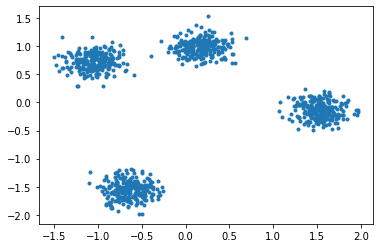

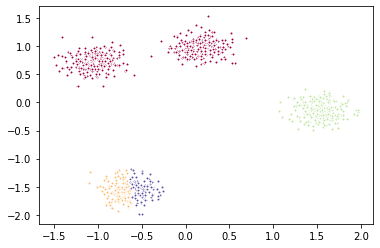

In [ ]:
import numpy as np # linear algebra
import os
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import seaborn as sns

class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters # cluster number
        self.max_iterations = 100 # max iteration. don't want to run inf time
        self.num_examples, self.num_features = X.shape # num of examples, num of features
        self.plot_figure = True # plot figure

    # randomly initialize centroids
    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for k in range(self.K): # iterations of
            centroid = X[np.random.choice(range(self.num_examples))] # random centroids
            centroids[k] = centroid
        return centroids # return random centroids

    # create cluster Function
    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            ) # closest centroid using euclidean distance equation(calculate distance of every point from centroid)
            clusters[closest_centroid].append(point_idx)
        return clusters

    # new centroids
    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids

    # prediction
    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples) # row1 fillup with zero
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred

    # plotinng scatter plot
    def plot_fig(self, X, y):
        fig = px.scatter(X[:, 0], X[:, 1], color=y)
        fig.show() # visualize

    # fit data
    def fit(self, X):
        centroids = self.initialize_random_centroids(X) # initialize random centroids
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids) # create cluster
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X) # calculate new centroids
            diff = centroids - previous_centroids # calculate difference
            if not diff.any(): # no more updates needed then stop the loop
                break
        y_pred = self.predict_cluster(clusters, X) # predict function

        fig=plt.figure(figsize=(6,4))
        ax=fig.add_subplot(1,1,1)
        colors=plt.cm.Spectral(np.linspace(0,1,4))

        for k, col in zip(range(4),colors):
          points=(y_pred==k)
          ax.plot(X[points,0],X[points,1],'w',markerfacecolor=col,marker='.')
        plt.show()
        return y_pred

if __name__ == "__main__":
    np.random.seed(10)
    num_clusters = 4 # num of cluster
    X, true_labels = make_blobs(n_samples=1000, centers=num_clusters, cluster_std=0.9, random_state=42)
    X = StandardScaler().fit_transform(X)
    plt.scatter(X[:,0],X[:,1],marker=".")
    Kmeans = KMeansClustering(X, num_clusters)
    y_pred = Kmeans.fit(X)



Try to improve the way to select centroids

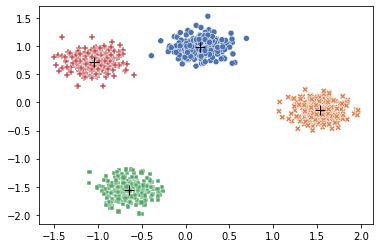

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X_train):
        # Initialize only the first centroid
        # then the rest are initialized with probabilities proportional to their distances to the first centroid
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances (i.e., p=dists)
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]

        # Iterate, adjusting centroids until converged or until passed max_iter
        # np.not_equal(self.centroids, prev_centroids): Check the convergence
        iteration = 0
        prev_centroids = None
        # .any(): returns True if at least one True exists
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

            prev_centroids = self.centroids
            # Update the centroids using mean of the points belonging to them
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points, then just keep the previous centroid
                    self.centroids[i] = prev_centroids[i]
            iteration += 1

    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            # pick the nearest centroid
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs

# Create a dataset of 2D distributions
centers = 4
X_train, true_labels = make_blobs(n_samples=1000, centers=centers, cluster_std=0.9, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
# Fit k-means to dataset
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)
# Visualize results
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         'k+',
         markersize=10,
         )
plt.show()

# Chapter 1-2. Use scikit-learn library






In [ ]:
from sklearn.cluster import KMeans


In [ ]:
k_means=KMeans(n_clusters=4,n_init=10)
k_means.fit(X)

KMeans(n_clusters=4)

In [ ]:
print('predicted lable for each sample: ',k_means.labels_)
print('centroids: ',k_means.cluster_centers_)

predicted lable for each sample:  [1 0 0 2 2 0 2 0 0 2 2 1 3 0 0 0 3 3 3 2 2 1 1 1 2 2 3 3 0 2 0 0 0 3 3 1 0
 2 1 1 2 0 2 1 2 1 3 2 1 2 0 3 2 1 3 1 3 3 3 0 0 3 0 1 2 3 0 0 2 3 1 3 2 0
 2 1 2 3 2 3 0 3 3 3 2 1 0 0 3 3 3 3 2 2 1 2 1 3 2 0 2 1 1 3 1 2 2 3 0 3 1
 0 2 2 2 2 0 1 0 2 3 0 1 2 1 0 2 1 0 2 3 0 2 1 2 1 3 0 2 2 3 3 1 1 1 2 2 3
 3 3 3 1 0 0 3 2 3 2 2 1 0 3 2 0 3 3 2 0 1 0 2 3 3 2 3 1 0 1 0 1 2 2 3 0 3
 0 2 1 3 0 2 3 2 2 3 1 0 0 0 1 3 0 2 3 2 2 0 3 2 0 0 1 0 0 2 3 0 3 1 2 1 1
 0 3 1 3 2 0 0 3 3 0 3 1 0 0 1 0 0 2 0 1 0 2 1 3 2 3 2 2 2 2 1 2 2 0 3 0 0
 2 2 2 1 2 1 1 0 2 3 1 2 3 2 0 3 1 2 1 0 2 1 0 1 2 0 3 3 0 3 1 1 3 0 0 0 3
 0 0 0 3 0 1 0 1 3 0 1 2 1 1 0 1 1 2 0 1 2 3 1 1 0 0 0 2 1 0 3 0 3 3 0 0 1
 1 0 3 1 2 1 2 1 0 0 2 3 2 1 1 3 3 3 3 3 2 3 3 0 2 3 1 2 0 0 2 1 2 1 1 1 0
 2 2 2 2 3 2 3 0 2 3 0 2 1 2 2 1 3 1 0 1 0 3 1 3 1 1 0 2 2 2 3 1 3 2 2 1 2
 3 3 1 2 3 1 0 1 0 0 3 1 2 3 2 3 3 3 1 0 1 2 0 3 3 1 3 1 0 1 0 0 3 1 1 1 2
 3 3 2 2 0 1 1 1 2 3 1 3 0 0 2 3 2 2 3 3 2 2 0 0 2 3 1 2 2 1 1 0 1

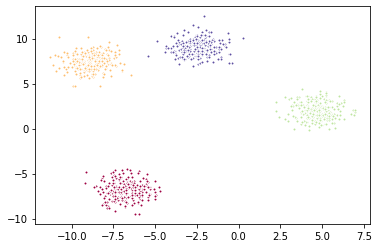

In [ ]:
y_pred=k_means.labels_

fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(1,1,1)
colors=plt.cm.Spectral(np.linspace(0,1,4))

for k, col in zip(range(4),colors):
  points=(y_pred==k)
  ax.plot(X[points,0],X[points,1],'w',markerfacecolor=col,marker='.')
plt.show()

Use elbow method (i.e., Sum of squared distances of samples to their closest centroid) to find the optimal k

In [ ]:
distortions=[]
for k in range(1,10):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distortions.append(k_means.inertia_) # intertia_: Sum of squared distances of samples to their closest cluster center

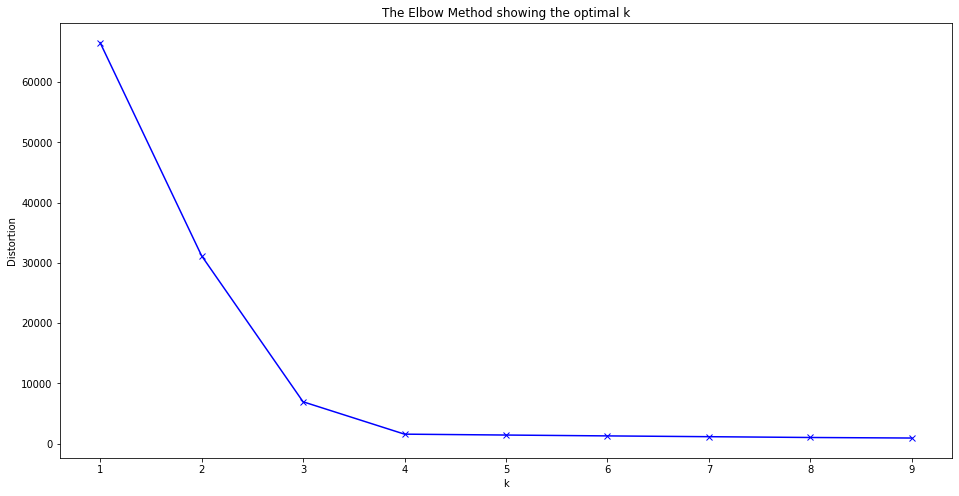

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(range(1,10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Thus, the elbow is 4 in this case.

Table of contents

Chapter 1.  k-means

✔ Chapter 2. DBSCAN

# Chapter 2-1. Implement from scratch and using sklearn


data source: Kaggle

In [ ]:
from scipy.spatial import distance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

simple_dbscan iterates through each data point and do the following:

1. Find neighbors
2. Expand cluster for core points

In [ ]:
def simple_DBSCAN(X, clusters, eps, minPts, metric=distance.euclidean):

    currentPoint = 0 # indicate the cluster index

    for i in range(0, X.shape[0]):
        if clusters[i] is not 0: # clusters are initialized with 0
            continue

        neighbors = neighborsGen(X, i, eps, metric) # identify neighbors for each data point

        if len(neighbors) < minPts: # noise or border points
            clusters[i] = -1

        else: # core points
            currentPoint += 1
            expand(X, clusters, i, neighbors, currentPoint, eps, minPts, metric)

    return clusters

<>:10: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:10: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-65-7169e3978177>:10: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if clusters[i] is not 0:


neighborsGen functions finds neighbors of current point

In [ ]:
def neighborsGen(X, point, eps, metric):

    neighbors = []

    for i in range(X.shape[0]):
        if metric(X[point], X[i]) < eps: # dist < eps, then it is the neighbor
            neighbors.append(i)

    return neighbors

expand function expands current cluster

In [ ]:
def expand(X, clusters, point, neighbors, currentPoint, eps, minPts, metric):
    clusters[point] = currentPoint

    i = 0
    while i < len(neighbors):

        nextPoint = neighbors[i]

        if clusters[nextPoint] == -1: # border point: it is neighbor of core points (although its len(neighbors)<minPts)
            clusters[nextPoint] = currentPoint

        elif clusters[nextPoint] == 0: # core point
            clusters[nextPoint] = currentPoint

            nextNeighbors = neighborsGen(X, nextPoint, eps, metric)

            if len(nextNeighbors) >= minPts: # the neighbor is also a core point then, update the neighbors.
                neighbors = neighbors + nextNeighbors

        i += 1

Gather all the functions above in Basic_DBSCAN class

In [ ]:
class Basic_DBSCAN:
    """
    Parameters:

    eps: Radius of neighborhood

    minPts: Number of neighbors to be a core point.

    metric: Distance metric of our choice

    """

    def __init__(self, eps, minPts, metric=distance.euclidean):
        self.eps = eps
        self.minPts = minPts
        self.metric = metric

    def fit_predict(self, X):
        """
        Parameters:

        X: input data

        Returns:

        [n] cluster labels
        """
        # initialize clusters
        clusters = [0] * X.shape[0]

        simple_DBSCAN(X, clusters, self.eps, self.minPts, self.metric)

        return clusters

In [ ]:
# Not working so please download it from cybercampus
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=11hN92n43IO94WvFuu1qtzcPEJJxIt8wt' -O minute_weather.csv

In [ ]:
import pandas as pd

df = pd.read_csv('minute_weather.csv') # ~10% of the original dataset
df = df.dropna() # dropping entries with missing values
df = df.head(1000) # taking the first 1000 entries; ~10% of the ~10%
df = df.drop(columns=['rowID', 'hpwren_timestamp', 'rain_accumulation', 'rain_duration']) # dropping unwanted columns
cols = df.columns

scanner = Basic_DBSCAN(eps=0.3, minPts=30)


Results are same as sk-learn: True


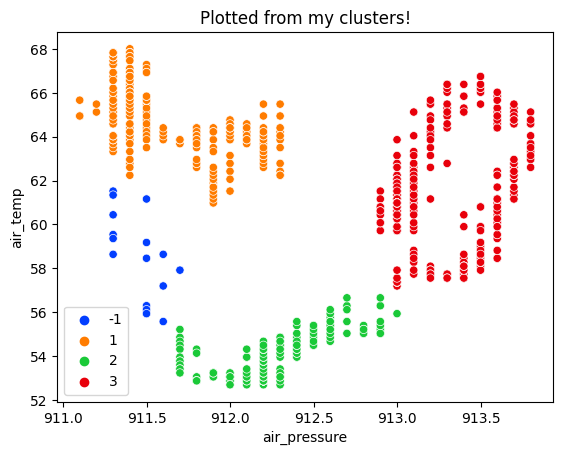

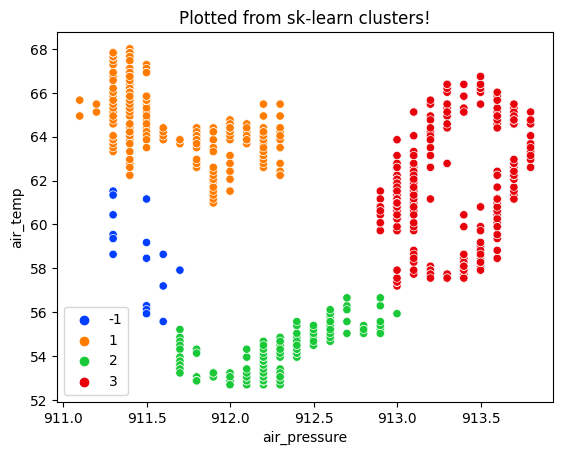

In [ ]:
X = df[[cols[0], cols[1]]]
X = StandardScaler().fit_transform(X)

clusters = scanner.fit_predict(X)

# Use scikit-learn for comparison
sk_clusters = DBSCAN(eps=0.3, min_samples=30, metric=distance.euclidean).fit(X).labels_
sk_clusters = [x+1
               if x != -1
               else x
               for x in sk_clusters]


# my clusters
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1],
                hue=clusters, palette='bright')
plt.title('Plotted from my clusters!')
plt.show();

# sk-learn clusters
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1],
                hue=sk_clusters, palette='bright')
plt.title('Plotted from sk-learn clusters!')
plt.show();